<a href="https://colab.research.google.com/github/vipasanasharma/Automated-Prediction-of-Avalanches/blob/main/NNM2_with_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
df = pd.read_csv ('/content/trainingdata.csv')
df = df.fillna(0)
df.head(20)

,Qs,Qg0,ILWR,LWR_net,ISWR,Qw,pAlbedo,ISWR_diff,TA,TSS_mod,...,zSn,Sn,zSs,Ss,S4,sn38_pwl_100,ccl_pwl_100,Pen_depth,min_ccl_pen,dangerLevel
0,6.689875,1.412750,218.295125,-86.298625,56.894625,6.519625,0.896000,35.768000,0.22500,-2.050000,...,15.739375,0.00000,15.739375,6.000000,6.000000,5.41,3.00,15.510000,4.00,2
1,14.823625,1.089000,214.024500,-62.756625,71.826875,16.826875,0.775375,24.709125,-0.17500,-8.612500,...,28.335000,4.55025,30.122000,0.141125,2.141125,2.34,0.33,16.137946,0.33,2
2,35.341000,4.082000,207.166750,-70.780625,73.285625,8.160625,0.893500,27.304250,-1.18750,-8.250000,...,15.333875,0.00000,15.333875,6.000000,6.000000,6.00,4.00,15.310000,4.00,2
3,15.825250,0.631750,215.945625,-86.913125,53.267375,9.517375,0.821750,30.210000,0.23750,-2.425000,...,25.832625,0.00000,25.832625,6.000000,6.000000,4.16,0.35,16.612166,0.35,1
4,11.049250,2.339125,214.966500,-82.191500,34.447375,3.465250,0.893500,31.141625,-0.29325,-3.722875,...,1.813000,6.00000,8.839750,6.000000,6.000000,6.00,3.00,8.470000,4.00,1
5,-15.006125,0.000000,206.573750,-98.831125,340.126500,301.501500,0.096375,51.278750,-1.63750,-1.800000,...,0.000000,6.00000,0.000000,6.000000,6.000000,0.00,0.00,0.000000,0.00,1
6,33.617250,13.499375,175.220625,-101.760000,27.220375,4.095375,0.829750,26.090875,-1.73750,-8.400000,...,8.357875,0.00000,11.913250,6.000000,6.000000,6.00,3.00,7.476260,3.00,1
7,26.791000,14.240750,175.254000,-80.002500,9.353250,2.228250,0.755125,9.153375,-1.68750,-13.750000,...,1.008000,6.00000,9.254875,6.000000,6.000000,6.00,4.00,9.240000,4.00,1
8,40.351375,1.819125,160.544000,-60.904125,96.495000,14.245000,0.861125,16.040375,-5.31250,-22.962500,...,20.440750,3.27300,45.362875,0.120000,2.120000,2.14,0.39,18.831875,0.39,2
9,-32.176125,0.000000,158.392750,-153.445500,85.506000,81.427625,0.090000,14.767500,-6.20000,-0.150000,...,0.000000,6.00000,0.000000,6.000000,6.000000,0.00,0.00,0.000000,0.00,2


In [3]:
#Changing pandas dataframe to numpy array
X = df.iloc[:,:30].values
y = df.iloc[:,30:31].values

#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

from sklearn.model_selection import train_test_split
train_x,X_test,train_y,y_test = train_test_split(X,y,test_size = 0.1)
#train_x=X
#train_y=y
print(train_x)
print (train_y)
#df.to_csv('pre.csv')

#creating variables and targets
#train_x = df.drop(columns=['dangerlevel'])
 #print (train_x)

#train_y = df[['dangerlevel']]
#print (train_y)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


#create model
model = Sequential()

#add model layers
model.add(Dense(50, activation='relu', input_dim=30))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))

#model.add(Dense(16, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))


#compile model using mse as a measure of model performance
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.optimizer.learning_rate = 0.001

history = model.fit(train_x,train_y, epochs=100, batch_size=64)

[[-8.17177729e-01 -4.75065389e-02  1.05635575e+00 ... -4.59208041e-01
  -5.55806309e-01  1.02245854e-01]
 [-1.10325059e-01 -1.57178116e-02  1.40434651e-01 ... -7.79252695e-01
   5.11478692e-01 -4.06025273e-01]
 [ 1.63481939e+00 -2.20511978e-02  7.64970386e-01 ... -4.59208041e-01
  -5.11039143e-01  1.28996966e-01]
 ...
 [-3.70685964e-01 -4.74641751e-02 -9.48522579e-01 ... -8.80007493e-01
   1.71133476e+00 -6.33409725e-01]
 [ 9.23581878e-02 -6.17195898e-02 -7.47280405e-01 ... -5.77743098e-01
  -2.49351506e-02 -2.45518601e-01]
 [ 8.93087731e-01 -7.89871783e-04 -1.52502404e+00 ... -8.38520223e-01
   6.98167910e-01 -3.79274161e-01]]
[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
Epoch 1/100
411/411 [==============================] - 8s 4ms/step - loss: 0.9542 - accuracy: 0.6153
Epoch 2/100
411/411 [==============================] - 2s 5ms/step - loss: 0.7369 - accuracy: 0.6952
Epoch 3/100
411/411 [===========================

In [4]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
    from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

92/92 [==============================] - 0s 2ms/step
Accuracy is: 74.76027397260275


In [5]:
history = model.fit(train_x, train_y,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
411/411 [==============================] - 3s 6ms/step - loss: 0.5826 - accuracy: 0.7562 - val_loss: 0.5859 - val_accuracy: 0.7490
Epoch 2/100
411/411 [==============================] - 2s 4ms/step - loss: 0.5849 - accuracy: 0.7576 - val_loss: 0.5847 - val_accuracy: 0.7500
Epoch 3/100
411/411 [==============================] - 2s 4ms/step - loss: 0.5828 - accuracy: 0.7594 - val_loss: 0.5838 - val_accuracy: 0.7503
Epoch 4/100
411/411 [==============================] - 2s 4ms/step - loss: 0.5830 - accuracy: 0.7598 - val_loss: 0.5842 - val_accuracy: 0.7507
Epoch 5/100
411/411 [==============================] - 2s 4ms/step - loss: 0.5822 - accuracy: 0.7586 - val_loss: 0.5825 - val_accuracy: 0.7538
Epoch 6/100
411/411 [==============================] - 2s 4ms/step - loss: 0.5817 - accuracy: 0.7570 - val_loss: 0.5835 - val_accuracy: 0.7455
Epoch 7/100
411/411 [==============================] - 2s 4ms/step - loss: 0.5836 - accuracy: 0.7589 - val_loss: 0.5848 - val_accuracy: 0.7466

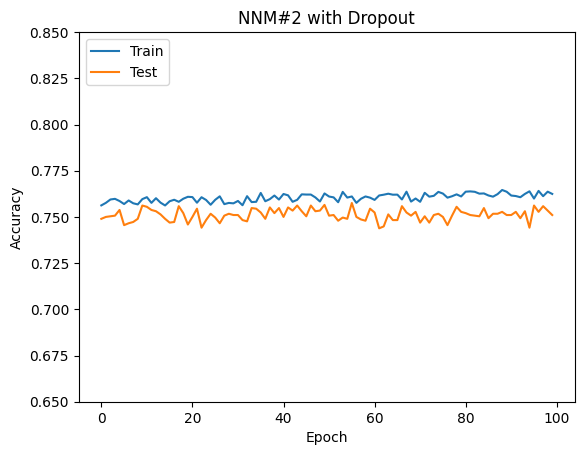

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0.65,0.85)
plt.title('NNM#2 with Dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

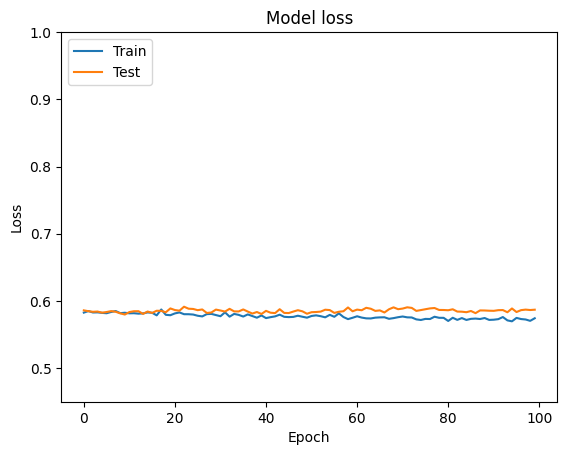

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0.45,1)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()